# i. Introduction

=================================================

Milestones 1

Nama : Sesilia Virdha Kezia 

Batch : HCK-027

Program ini dibuat untuk menganalisis data histori transaksi pelanggan, seperti usia, gender, dan waktu pembelian, untuk menentukan pola perilaku pelanggan yang dapat digunakan dalam merancang strategi promosi yang lebih efektif dan tepat sasaran, dengan tujuan utama meningkatkan penjualan dan efisiensi operasional toko.

link tableau : https://public.tableau.com/views/Milestone1_Sesil/Chart?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

=================================================

# ii. Problem Statement and Dataset Description

### Latar belakang
Perusahaan Cherry on Top merupakan perusahaan bakery yang berupaya meningkatkan penjualan dan efisiensi operasional. Namun ketidakpastian pola waktu pembelian pelanggan menyebabkan ketidakefisienan dalam penjadwalan staf dan pengelolaan bahan baku. Di sisi lain strategi promosi yang ada belum disesuaikan dengan karakteristik perilaku pelanggan.

Dengan kondisi ini maka diperlukan analisis terhadap data histori transaksi pelanggan, seperti usia, gender, dan waktu pembelian. analisis ini bertujuan untuk merancang promosi supaya tepat sasaran.

### Problem statement
Penjualan mengalami penurunan penjualan, strategi promosi yang digunakan belum sepenuhnya disesuaikan dengan karakteristik pelanggan. Minimnya analisis berbasis data membuat promosi yang dilakukan kurang tepat sasaran dan belum mampu meratakan kunjungan pelanggan. Akibatnya peluang untuk meningkatkan pendapatan dan efisiensi operasional belum termanfaatkan secara optimal. Oleh karena itu, diperlukan strategi promosi baru yang lebih terarah dan berbasis data historis transaksi pelanggan, dengan target peningkatan penjualan sebesar 15% dalam waktu 3 bulan.

SMART Analysis

Specific : Meningkatkan penjualan dengan memaksimalkan strategi promosi yang tepat sasaran

Measureable: Meningkatkan penjualan sebanyak 15% dalam 3 bulan

Achievable : 
1. Menganalisis data histori transaksi yang meliputi waktu pembelian, umur, dan gender dari pelanggan
2. Mengidentifikasi jam sepi berdasarkan data transaksi lalu merancang ide promo happy hour untuk diuji coba di bulan berikutnya untuk meratakan kunjungan dan mengefesienkan penjadwalan staff sesuai jam sepi atau ramai.
3. Menganalisis kelompok pelanggan potensial untuk target promosi selanjutnya

Relevant : Meningkatkan efektivitas strategi penjualan melalui analisis data transaksi pelanggan untuk merancang program promosi yang lebih tepat sasaran. Dengan karakteristik pelanggan, manajemen dapat meningkatkan loyalitas, mendorong pertumbuhan pendapatan, dan mengatur jadwal kerja staf secara lebih efisien.

Time Bound: Diharapkan goal ini akan dicapai dalam 3 bulan kedepan dengan melakukan evaluasi secara teratur perbulan untuk melihat progres

Stakeholders : Sales Marketing, Operasional

Metric : Sales growth metrics, Average amount spent per month

### Sumber dataset
kaggle :  https://www.kaggle.com/datasets/sarthakmangalmurti/bakery-customer-data/data

### Penjabaran masalah
5W1H
1. Pada waktu apa terjadi jumlah transaksi terbanyak dan tersepi?
2. Bagaimana perbandingan total pembelian antara gender?
3. Metode pembayaran apa yang paling sering digunakan pelanggan?
4. Bagaimana tren total penjualan per bulan?
5. Bagaimana perbandingan antara member/non-member terhadap total belanja setiap bulannya
6. Bagaimana perbandingan range umur terhapat total pembelian?
7. Bagaimana rata-rata, median, modus, dan persebaran data usia pelanggan yang sudah menjadi member?
8. Apakah ada hubungan antara gender dengan waktu pembelian?



# iii. Data Loading


In [1]:
# mengimport package yang diperlukan
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# membaca file csv data kotor 
df = pd.read_csv('dataset.csv')
df

,Bakery_ID,Customer_ID,Age,Gender,Items_Purchased,Amount_Spent,Purchase_Date,Time_of_Purchase,Loyalty_Member,Payment_Method
0,Bakery_1,1,22,Female,5,48.75,2024-08-02,Afternoon,Yes,Mobile Payment
1,Bakery_1,2,23,Female,4,39.32,2024-09-15,Morning,No,Mobile Payment
2,Bakery_1,3,64,Non-binary,16,136.53,2024-08-07,Morning,No,Cash
3,Bakery_1,4,32,Female,9,68.82,2024-09-18,Morning,Yes,Cash
4,Bakery_1,5,19,Female,16,95.18,2024-05-05,Evening,No,Cash
...,...,...,...,...,...,...,...,...,...,...
495,Bakery_5,96,43,Female,18,159.90,2024-07-04,Evening,Yes,Mobile Payment
496,Bakery_5,97,46,Female,1,14.10,2024-07-19,Morning,No,Cash
497,Bakery_5,98,40,Male,14,165.90,2024-08-22,Evening,Yes,Mobile Payment
498,Bakery_5,99,21,Male,1,12.06,2024-09-25,Morning,No,Card


In [3]:
# untuk menampilkan summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bakery_ID         500 non-null    object 
 1   Customer_ID       500 non-null    int64  
 2   Age               500 non-null    int64  
 3   Gender            500 non-null    object 
 4   Items_Purchased   500 non-null    int64  
 5   Amount_Spent      500 non-null    float64
 6   Purchase_Date     500 non-null    object 
 7   Time_of_Purchase  500 non-null    object 
 8   Loyalty_Member    500 non-null    object 
 9   Payment_Method    500 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 39.2+ KB


In [4]:
# melihat kolom apa saja yg terdapat di dataframe
df.columns

Index(['Bakery_ID', 'Customer_ID', 'Age', 'Gender', 'Items_Purchased',
       'Amount_Spent', 'Purchase_Date', 'Time_of_Purchase', 'Loyalty_Member',
       'Payment_Method'],
      dtype='object')

#### Penjelasan kolom

1. Bakery_ID : Sebagai identitas unik tiap toko roti
2. Customer_ID : Kode unik tiap pelanggan
3. Items_Purchased : Menunjukkan jumlah barang yang dibeli dalam satu transaksi
4. Amount_Spent : Total pengeluaran pelanggan per kunjungan
5. Payment_Method : Jenis pembayaran yang digunakan (card, cash, mobile)
6. Loyalty Member : Menunjukkan apakah pelanggan tergabung dalam program loyalitas
7. Age : Usia pelanggan saat transaksi
8. Gender : Jenis kelamin pelanggan
9. Purchase_Date : Tanggal transaksi dilakukan; digunakan untuk mengidentifikasi tren musiman dan waktu ramai belanja.
10. Time_of_Purchase : Waktu pembelian (misalnya pagi, siang, sore)

Pada proses data load kita akan mengimport dataset yang sudah dimiliki ke dalam dataframe. Melihat summary dari datafame dengan method info() dan melihat nama kolom dalam dataframe

# iv. Data Cleaning

Disini saya membuat dataframe baru main dengan menghapus kolom bakery_id karena ingin fokus analisis untuk keseluruhan bukan membandingkan performa antar cabang. kolom customer id karena berhubungan dengan bakery jika tidak dihapus maka akan menjadi ambigu karena id customer 1 di bakery_1 dan bakery_2 kemungkinan tidak sama.

In [5]:
main = df[['Age', 'Gender', 'Items_Purchased', 'Amount_Spent', 'Purchase_Date', 'Time_of_Purchase', 'Loyalty_Member', 'Payment_Method']]
main

,Age,Gender,Items_Purchased,Amount_Spent,Purchase_Date,Time_of_Purchase,Loyalty_Member,Payment_Method
0,22,Female,5,48.75,2024-08-02,Afternoon,Yes,Mobile Payment
1,23,Female,4,39.32,2024-09-15,Morning,No,Mobile Payment
2,64,Non-binary,16,136.53,2024-08-07,Morning,No,Cash
3,32,Female,9,68.82,2024-09-18,Morning,Yes,Cash
4,19,Female,16,95.18,2024-05-05,Evening,No,Cash
...,...,...,...,...,...,...,...,...
495,43,Female,18,159.90,2024-07-04,Evening,Yes,Mobile Payment
496,46,Female,1,14.10,2024-07-19,Morning,No,Cash
497,40,Male,14,165.90,2024-08-22,Evening,Yes,Mobile Payment
498,21,Male,1,12.06,2024-09-25,Morning,No,Card


In [6]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               500 non-null    int64  
 1   Gender            500 non-null    object 
 2   Items_Purchased   500 non-null    int64  
 3   Amount_Spent      500 non-null    float64
 4   Purchase_Date     500 non-null    object 
 5   Time_of_Purchase  500 non-null    object 
 6   Loyalty_Member    500 non-null    object 
 7   Payment_Method    500 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 31.4+ KB


In [7]:
# megganti tipe data kolom purchase amount menjadi datetime
main['Purchase_Date'] = pd.to_datetime(main['Purchase_Date'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_11340\981468298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Purchase_Date'] = pd.to_datetime(main['Purchase_Date'])


In [8]:
# melihat missing values dapat dilihat bahwa didalam dataframe main tidak ada missing values, maka tidak diperlukan dropna
main.isnull().sum()

Age                 0
Gender              0
Items_Purchased     0
Amount_Spent        0
Purchase_Date       0
Time_of_Purchase    0
Loyalty_Member      0
Payment_Method      0
dtype: int64

Proses data cleaning dilakukan untuk membersihkan atau menyiapkan data supaya lebih akurat. sehingga disini saya tidak menggunakan kolom bakery_id dan customer_id, mengganti tipe data terhadap kolom Time_of_Purchase menjadi datetime, dan mengecek ada atau tidaknya missing value.

In [9]:
# menyimpan dataset yang bersih   
main.to_csv('cleaned_dataset.csv', index=False)

# v. Exploration and Analysis


### 1. Jumlah transaksi sesuai waktu pembelian


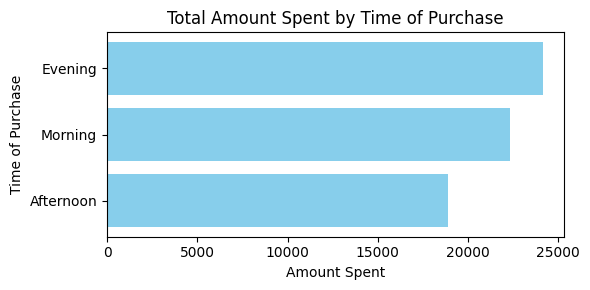

In [10]:
# Group by kolom Time_of_Purchase dan jumlahkan Amount_Spent
df_time = main.groupby('Time_of_Purchase')['Amount_Spent'].sum().reset_index()

# Urutkan berdasarkan jumlah Amount_Spent agar ascending
df_time = df_time.sort_values('Amount_Spent', ascending=True)

# Buat bar chart horizontal
plt.figure(figsize=(6, 3))
plt.barh(df_time['Time_of_Purchase'], df_time['Amount_Spent'], color='skyblue')
plt.xlabel('Amount Spent')
plt.ylabel('Time of Purchase')
plt.title('Total Amount Spent by Time of Purchase')

plt.tight_layout()
plt.show()

Insight: Jumlah transaksi terbanyak terjadi pada sore dan paling sedikit pada siang hari

### 2. Perbandingan jumlah belanja berdasarkan gender

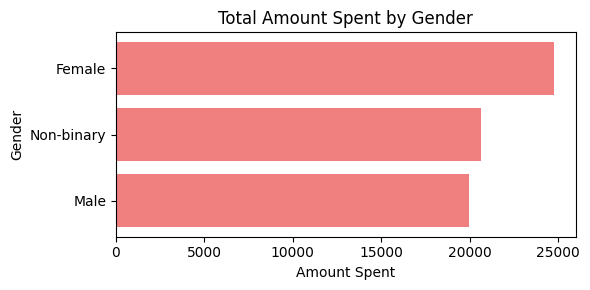

In [11]:
# Group by kolom Gender dan jumlahkan Amount_Spent
df_gender = main.groupby('Gender')['Amount_Spent'].sum().reset_index()

# Urutkan berdasarkan Amount_Spent agar tampil ascending
df_gender = df_gender.sort_values('Amount_Spent', ascending=True)

# Buat bar chart horizontal
plt.figure(figsize=(6, 3))  # ukuran dalam inch (width=6, height=3)
plt.barh(df_gender['Gender'], df_gender['Amount_Spent'], color='lightcoral')
plt.xlabel('Amount Spent')
plt.ylabel('Gender')
plt.title('Total Amount Spent by Gender')

plt.tight_layout()
plt.show()

insight : Gender yang paling besar pengeluaran untuk membeli adalah wanita dan yang terkecil adalah pria

### 3. Persentase metode pembayaran terpopuler

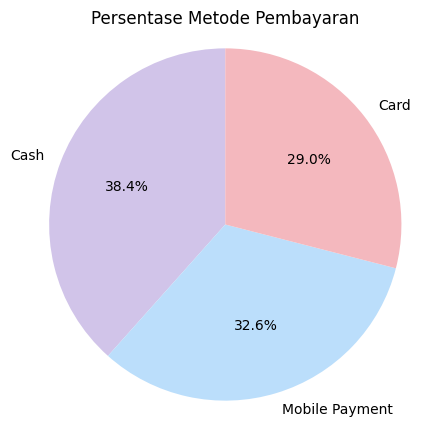

In [12]:
# Hitung jumlah tiap kategori Payment_Method
payment_counts = main['Payment_Method'].value_counts()

# Buat pie chart
plt.figure(figsize=(5, 5)) 
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#D1C4E9', '#BBDEFB', "#F4B8BE"])
plt.title('Persentase Metode Pembayaran')
plt.axis('equal')
plt.show()

Insight: Metode pembayaran paling banyak digunakan adalah cash dengan 38.4% dan paling jarang adalah card 29%

### 4. Total Penjualan Per Bulan

In [13]:
# membuat dataframe baru dengan nama df_monthy
df_monthly = main.groupby(main['Purchase_Date'].dt.strftime("%Y/%m"))['Amount_Spent'].sum().reset_index()
df_monthly = df_monthly.sort_values('Purchase_Date')
df_monthly


,Purchase_Date,Amount_Spent
0,2024/04,7768.66
1,2024/05,10207.00
2,2024/06,12527.58
3,2024/07,10738.75
4,2024/08,12114.26
5,2024/09,9517.30
6,2024/10,2498.48


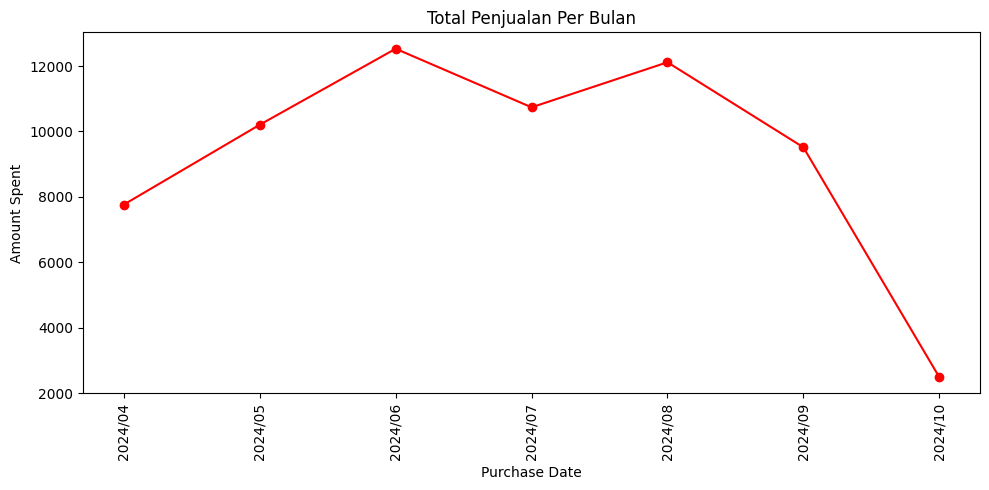

In [14]:
# Buat line chart
plt.figure(figsize=(10, 5))
plt.plot(df_monthly['Purchase_Date'], df_monthly['Amount_Spent'], marker='o', color='red')

# Format axis
plt.xticks(rotation=90)
plt.xlabel('Purchase Date')
plt.ylabel('Amount Spent')
plt.title('Total Penjualan Per Bulan')

plt.tight_layout()
plt.show()

Insight : 
1. Total penjual tertinggi terdapat di bulan juni 2024 dan terendah di bulan oktober 2024
2. Total pembelian terus meningkat mulai bulan april sampai juni dan terus menurun mulai bulan agustus sampai oktober

### 5. Perbandingan antara member/non-member terhadap total belanja setiap bulannya

In [15]:
''' Membuat dataframe baru main_sorted yang terdapat kolom amount spent, loyalty member dan month yang didapat dari kolom purchase date berupa 
tahun dan bulan.  lalu groupby sesuai dengan loyalty  member dan amount spent
'''
main_sorted = main[['Amount_Spent','Loyalty_Member']]
main_sorted['Month'] = main['Purchase_Date'].dt.strftime("%Y/%m")
main_sorted = main_sorted.groupby(['Month', 'Loyalty_Member'])['Amount_Spent'].sum().reset_index()
main_sorted

C:\Users\Acer\AppData\Local\Temp\ipykernel_11340\2881829238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_sorted['Month'] = main['Purchase_Date'].dt.strftime("%Y/%m")


,Month,Loyalty_Member,Amount_Spent
0,2024/04,No,5084.76
1,2024/04,Yes,2683.90
2,2024/05,No,4963.04
3,2024/05,Yes,5243.96
4,2024/06,No,6324.22
5,2024/06,Yes,6203.36
6,2024/07,No,4088.76
7,2024/07,Yes,6649.99
8,2024/08,No,6574.51
9,2024/08,Yes,5539.75


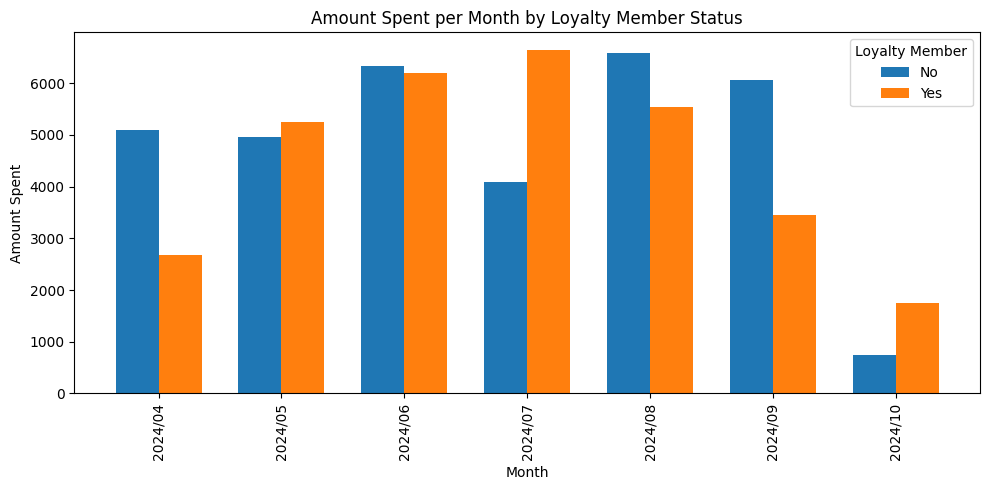

In [16]:
# Pivot agar mudah membuat grouped bar chart
pivot_df = main_sorted.pivot(index='Month', columns='Loyalty_Member', values='Amount_Spent').fillna(0)

# Plot
months = pivot_df.index
x = np.arange(len(months))  # posisi X untuk setiap bulan
width = 0.35  # lebar bar

# Ambil nama-nama kategori Loyalty_Member
categories = pivot_df.columns

plt.figure(figsize=(10, 5))

# Loop untuk setiap kategori Loyalty_Member
for i, category in enumerate(categories):
    plt.bar(x + i * width, pivot_df[category], width, label=str(category))

# Format axis
plt.xticks(x + width / 2, months, rotation=90)
plt.xlabel('Month')
plt.ylabel('Amount Spent')
plt.title('Amount Spent per Month by Loyalty Member Status')
plt.legend(title='Loyalty Member')

plt.tight_layout()
plt.show()

Insight : 
1. Pelanggan member total pembelian paling tinggi terdapat di bulan Juli 2024 dan terendah di oktober 2024
2. Pelanggan non member total pembelian paling tinggi terdapat di bulan Agustus 2024 dan terendah di Oktober 2024
3. Penurunan yang signifikan di bulan Oktober baik pelanggan member maupun non member
4. Pelanggan non member cenderung lebih banyak melakukan pembelian dibandingan pelanggan member dapat dilihat pada bulan april, juni, agustus, dan september.

### 6. Perbandingan range umur terhapat total pembelian

In [17]:
# Membuat bins untuk membuat rentang terhadap usia
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Kelompokkan berdasarkan rentang usia dan jumlahkan Amount_Spent
df_age = main.groupby(pd.cut(main['Age'], bins=bins, labels=labels))['Amount_Spent'].sum().reset_index()

# Urutkan berdasarkan Amount_Spent descending (sesuai categoryorder='total descending')
df_age = df_age.sort_values('Amount_Spent', ascending=False)


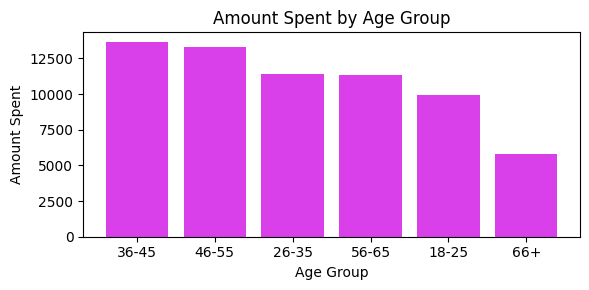

In [18]:
# Buat bar chart
plt.figure(figsize=(6, 3))
plt.bar(df_age['Age'], df_age['Amount_Spent'], color="#D940EA")

# Tambahkan label dan judul
plt.xlabel('Age Group')
plt.ylabel('Amount Spent')
plt.title('Amount Spent by Age Group')

plt.tight_layout()
plt.show()

Insight : total belanja pada rentang umur 36 sampai 45 paling tinggi dan paling rendah terdapat di rentang umur 66 tahun ke atas

### 7. Rata-rata, Median, Mean, dan penyebaran umur yang merupakan member

In [19]:
# menghitung rata-rata dengan mean(), median dengan median(), modus dengan mode(), dan standar deviasi denga std()
average_age_member = main[main['Loyalty_Member'] == 'Yes']['Age'].mean()
print(f"Rata-rata usia member: {average_age_member:.2f} tahun")
median_age_member = main[main['Loyalty_Member'] == 'Yes']['Age'].median()
print(f"Median usia member: {median_age_member:.2f} tahun")
modus_age_member = main[main['Loyalty_Member'] == 'Yes']['Age'].mode().values[0]
print(f"Modus usia member: {modus_age_member:.2f} tahun")
deviasi_age_member = main[main['Loyalty_Member'] == 'Yes']['Age'].std()
print(f'Standar Deviasi: {deviasi_age_member:.2f}')

Rata-rata usia member: 43.33 tahun
Median usia member: 43.00 tahun
Modus usia member: 54.00 tahun
Standar Deviasi: 14.69


Nilai rata-rata dan median yang berdekatan menunjukkan bahwa distribusi usia relatif simetris di sekitar usia 43 tahun Tetapi modus yang berada di 54 tahun menandakan bahwa usia 54 merupakan usia yang paling sering muncul.
Nilai standar deviasi sebesar 14.69 tahun menunjukkan bahwa ada penyebaran usia yang cukup lebar di antara para member. Artinya terdapat variasi yang cukup signifikan baik dari usia yang lebih muda maupun lebih tua.

### 8. Hubungan antara gender dengan waktu pembelian 

menggunakan chi squared test untuk menganalisis apakah ada hubungan antara variabel kategori gender dan waktu pembelian.

H0: Tidak ada hubungan antara gender dan waktu pembelian.

H1: Ada hubungan antara gender dan waktu pembelian.

In [20]:
contingency_table = pd.crosstab(main['Gender'],main['Time_of_Purchase'])
contingency_table

Time_of_Purchase,Afternoon,Evening,Morning
Gender,,,
Female,46,67,69
Male,53,49,47
Non-binary,46,63,60


In [21]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.3157741978597857


Kesimpulan : 

Critical value = 0.05

P-value didapatkan 0.31 artinya lebih besar dari critical value maka H0 gagal di tolak/ diterima. Tidak ada hubungan yang signifikan secara statistik antara gender dan waktu pembelian berdasarkan data. Ini berarti bahwa waktu pembelian tampaknya tidak dipengaruhi oleh gender dalam kumpulan data ini.

# vi. Conclusion
Berdasarkan analisis data transaksi pelanggan dari toko Cherry on Top, berikut adalah kesimpulan:


1. Jumlah transaksi paling banyak terjadi pada sore hari, sementara yang paling sedikit terjadi pada siang hari. Hal ini menunjukkan peluang untuk mengatur strategi promosi seperti Happy Hour di waktu sepi untuk meratakan kunjungan.
2. Pelanggan wanita memiliki total pengeluaran tertinggi, sedangkan pria yang terendah. Ini menunjukkan bahwa promosi yang diarahkan untuk pelanggan wanita lebih berpotensi dalam meningkatkan penjualan.
3. Metode pembayaran yang paling sering digunakan adalah tunai sementara card adalah yang paling jarang.
4. Total penjualan tertinggi tercatat pada Juni 2024, dan terendah pada Oktober 2024. Penjualan meningkat dari April hingga Juni, namun mengalami penurunan mulai Agustus hingga Oktober. Hal ini dapat menjadi acuan dalam mengatur momentum promosi.
5. Non-member cenderung lebih aktif belanja di beberapa bulan April, Juni, Agustus, dan September, yang menunjukkan potensi untuk mendorong konversi ke program membership.
6. Kelompok usia 36–45 tahun mencatat total pembelian tertinggi, sedangkan kelompok 66 tahun ke atas yang terendah. Ini menunjukkan bahwa segmen usia produktif adalah target utama yang paling potensial.
7. Distribusi yang relatif simetris dan penyebaran yang cukup besar menunjukkan bahwa program promosi member perlu mempertimbangkan keberagaman usia.
8. Berdasarkan uji chi-square, tidak ditemukan hubungan signifikan antara gender dan waktu pembelian (p-value 0.31 > 0.05). Artinya, waktu belanja tidak dipengaruhi oleh gender secara statistik.


 

# Recommendation
**Marketing**
1. Menerapkan promo happy hour di siang hari untuk meratakan kunjungan
2. Fokus promosi pada kategori wanita dan usia 36–45 tahun sebagai pelanggan yang paling berkontribusi terhadap penjualan
3. Memberikan promo menarik untuk pelanggan yang baru mendaftar menjadi member.
4. Tawarkan promo tambahan untuk member agar tetap aktif berbelanja.

**Operasional**
1. Menyesuaikan jadwal kerja staf berdasarkan pola peak hour untuk meningkatkan efisiensi dan kualitas layanan.
